In [1]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.activations import linear, relu
from tensorflow.nn import softmax
from tensorflow.keras.utils import load_img, img_to_array, image_dataset_from_directory, split_dataset
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential

In [2]:
train_data_folder = 'images/rick_and_morty_split/train_data'
test_data_folder = 'images/rick_and_morty_split/test_data'

train_data = image_dataset_from_directory(train_data_folder, image_size=(224, 224))

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen.flow_from_directory(
    train_data_folder,
    target_size=(224, 224),
    batch_size=64,
    class_mode='sparse'
)

test_data = image_dataset_from_directory(test_data_folder, image_size=(224, 224))

# images_data = 'images/rick_and_morty/'
# train_data, test_data = split_dataset(image_dataset_from_directory(images_data, image_size=(224, 224)), 0.8)

nb_classes = 5
labels = ['birdperson', 'meeseeks', 'morty', 'poopybutthole', 'rick']
input_shape = (224, 224, 3)

Found 125 files belonging to 5 classes.
Found 125 images belonging to 5 classes.
Found 25 files belonging to 5 classes.


# Vlastní model

In [81]:
model = tf.keras.models.Sequential([])
model.add(InputLayer(input_shape = input_shape))
model.add(Conv2D(filters=32, kernel_size=(5, 5)))
model.add(MaxPool2D(strides=2, pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(MaxPool2D(strides=2, pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, activation=relu))
model.add(MaxPool2D(strides=2, pool_size=(2, 2)))
model.add(Flatten(name='Flatten'))
model.add(Dense(units=30, activation=relu))
model.add(Dense(units=nb_classes, activation=linear, name='logits'))
model.add(Activation(activation=softmax))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 0 : 0.20000000298023224 | 0.20000000298023224 
Epoch 1 : 0.20000000298023224 | 0.1679999977350235 
Epoch 2 : 0.2800000011920929 | 0.20800000429153442 
Epoch 3 : 0.4399999976158142 | 0.328000009059906 
Epoch 4 : 0.4000000059604645 | 0.46399998664855957 
Epoch 5 : 0.4000000059604645 | 0.4560000002384186 
Epoch 6 : 0.47999998927116394 | 0.4000000059604645 
Epoch 7 : 0.47999998927116394 | 0.4480000138282776 
Epoch 8 : 0.5199999809265137 | 0.5920000076293945 
Epoch 9 : 0.800000011920929 | 0.5519999861717224 
Epoch 10 : 0.6000000238418579 | 0.6399999856948853 
Epoch 11 : 0.6800000071525574 | 0.6639999747276306 
Epoch 12 : 0.800000011920929 | 0.7200000286102295 
Epoch 13 : 0.8399999737739563 | 0.8399999737739563 
Epoch 14 : 0.6800000071525574 | 0.7839999794960022 
Epoch 15 : 0.800000011920929 | 0.7919999957084656 
Epoch 16 : 0.8399999737739563 | 0.8560000061988831 
Epoch 17 : 0.7200000286102295 | 0.8960000276565552 
Epoch 18 : 0.8799999952316284 | 0.871999979019165 
Epoch 19 : 0.8399999

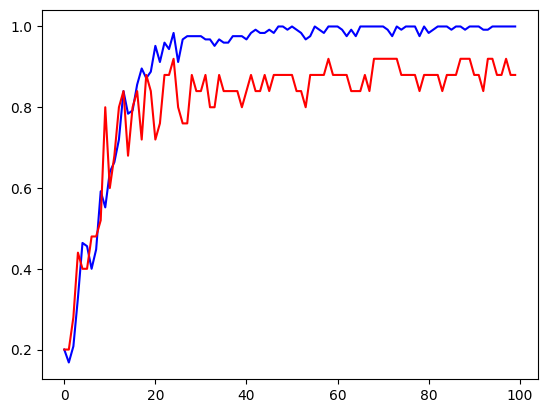

In [82]:
counter = 0
train_accuracy, test_accuracy = 0, 0
test_accuracies = []
train_accuracies = []
while(counter < 100 and ( test_accuracy < 0.99 or train_accuracy < 0.99 )):
    train_accuracy = model.fit(train_data_augmented, batch_size=128, epochs=1, verbose=0).history['accuracy'][0]
    train_accuracies.append(train_accuracy)
    test_accuracy = model.evaluate(test_data, verbose=0)[1]
    test_accuracies.append(test_accuracy)
    print(f"Epoch {counter} : {test_accuracy} | {train_accuracies[-1]} ")
    counter += 1

plt.plot(train_accuracies, 'b', test_accuracies, 'r')
print(test_accuracies)
print(train_accuracies)

# MobileNet

In [3]:
from keras.applications.mobilenet import MobileNet
mobile = MobileNet(include_top=False, input_shape=(224,224,3), pooling='avg', weights='imagenet', classes=5)

model = Sequential()
model.add(mobile)
model.add(Dense(5, activation='softmax'))
model.add(Activation(activation=softmax))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 0 : 0.20000000298023224 | 0.5360000133514404 
Epoch 1 : 0.20000000298023224 | 0.9359999895095825 
Epoch 2 : 0.2800000011920929 | 0.9599999785423279 
Epoch 3 : 0.2800000011920929 | 0.984000027179718 
Epoch 4 : 0.4000000059604645 | 1.0 
Epoch 5 : 0.4000000059604645 | 0.9599999785423279 
Epoch 6 : 0.36000001430511475 | 1.0 
Epoch 7 : 0.36000001430511475 | 0.9760000109672546 
Epoch 8 : 0.4000000059604645 | 0.9679999947547913 
Epoch 9 : 0.5199999809265137 | 0.984000027179718 
Epoch 10 : 0.6800000071525574 | 0.9919999837875366 
Epoch 11 : 0.6800000071525574 | 1.0 
Epoch 12 : 0.800000011920929 | 0.9919999837875366 
Epoch 13 : 0.8399999737739563 | 1.0 
Epoch 14 : 0.800000011920929 | 0.9919999837875366 
Epoch 15 : 0.800000011920929 | 0.9919999837875366 
Epoch 16 : 0.800000011920929 | 1.0 
Epoch 17 : 0.800000011920929 | 1.0 
Epoch 18 : 0.8799999952316284 | 1.0 
Epoch 19 : 0.8399999737739563 | 1.0 
Epoch 20 : 0.6399999856948853 | 0.9760000109672546 
Epoch 21 : 0.7200000286102295 | 0.9840000

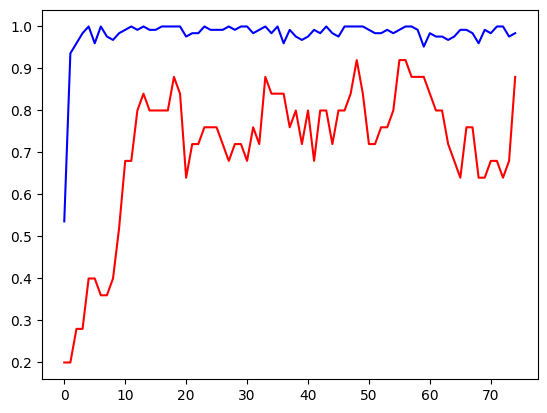

In [4]:
counter = 0
train_accuracy, test_accuracy = 0, 0
test_accuracies = []
train_accuracies = []
while(counter < 75 and test_accuracy < 0.99):
    curr_history = model.fit(train_data, batch_size=128, epochs=1, verbose=0)
    train_accuracies.append(curr_history.history['accuracy'][0])
    test_accuracy = model.evaluate(test_data, verbose=0)[1]
    test_accuracies.append(test_accuracy)
    print(f"Epoch {counter} : {test_accuracy} | {train_accuracies[-1]} ")
    counter += 1

plt.plot(train_accuracies, 'b', test_accuracies, 'r')
print(test_accuracies)
print(train_accuracies)

# Xception

In [68]:
from keras.applications.xception import Xception
base_model = Xception(include_top=False, input_shape=(224,224,3), pooling='avg', weights='imagenet', classes=5)

model = Sequential()
model.add(base_model)
model.add(Dense(5, activation='softmax'))
model.add(Activation(activation=softmax))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 0 : 0.1599999964237213 | 0.7039999961853027 
Epoch 1 : 0.2800000011920929 | 0.984000027179718 
Epoch 2 : 0.6399999856948853 | 1.0 
Epoch 3 : 0.8799999952316284 | 1.0 
Epoch 4 : 0.9599999785423279 | 1.0 
Epoch 5 : 0.9599999785423279 | 1.0 
Epoch 6 : 0.9599999785423279 | 1.0 
Epoch 7 : 0.9599999785423279 | 1.0 
Epoch 8 : 0.9599999785423279 | 1.0 
Epoch 9 : 0.9599999785423279 | 1.0 
Epoch 10 : 1.0 | 1.0 
[0.1599999964237213, 0.2800000011920929, 0.6399999856948853, 0.8799999952316284, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 1.0]
[0.7039999961853027, 0.984000027179718, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


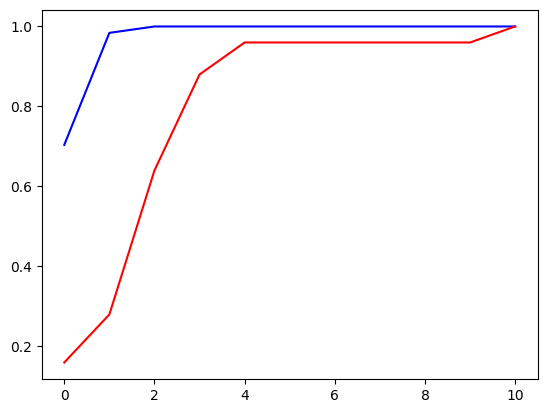

In [69]:
counter = 0
train_accuracy, test_accuracy = 0, 0
test_accuracies = []
train_accuracies = []
while(counter < 75 and test_accuracy < 0.99):
    curr_history = model.fit(train_data, batch_size=128, epochs=1, verbose=0)
    train_accuracies.append(curr_history.history['accuracy'][0])
    test_accuracy = model.evaluate(test_data, verbose=0)[1]
    test_accuracies.append(test_accuracy)
    print(f"Epoch {counter} : {test_accuracy} | {train_accuracies[-1]} ")
    counter += 1

plt.plot(train_accuracies, 'b', test_accuracies, 'r')
print(test_accuracies)
print(train_accuracies)